In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
from scipy.stats import skew, kurtosis
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv("sales_data_with_discounts.csv")

In [4]:
numeric=data.select_dtypes(include=['number'])

In [5]:
numeric

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [6]:
numeric.mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [7]:
numeric.median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [8]:
numeric.mode()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [9]:
numeric.std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

#Data Visualization

In [10]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Volume             450 non-null    int64  
 1   Avg Price          450 non-null    int64  
 2   Total Sales Value  450 non-null    int64  
 3   Discount Rate (%)  450 non-null    float64
 4   Discount Amount    450 non-null    float64
 5   Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 21.2 KB


(array([213., 137.,  49.,  26.,  15.,   2.,   0.,   4.,   1.,   3.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

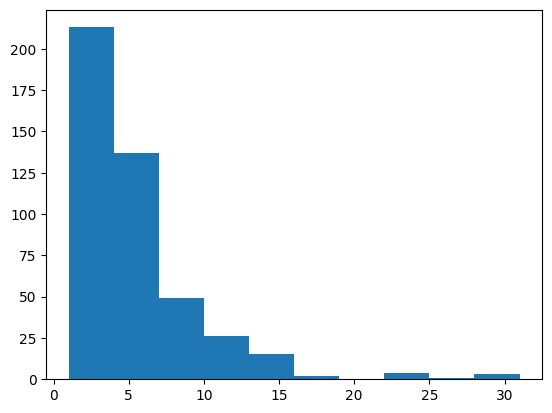

In [11]:
mt.hist(numeric['Volume'])

#Skewness and kurtosis for volume column

In [12]:
skewness=skew(numeric['Volume'])
kurt=kurtosis(numeric['Volume'])
print(skewness)
print(kurt)

2.7226094367513567
10.131613573921445


#outliers for Column Volume

In [13]:
q1 = numeric['Volume'].quantile(0.25)
q3 = numeric['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = numeric['Volume'][(numeric['Volume'] < lower_bound) | (numeric['Volume'] > upper_bound)]
print({len(outliers)})
print(outliers)

{44}
0      15
10     13
30     11
40     29
50     13
70     24
71     14
80     12
100    25
101    15
102    11
130    15
140    14
161    12
170    12
180    12
190    22
192    11
193    11
200    12
201    12
210    14
221    11
222    11
240    15
250    31
251    12
260    16
280    24
281    11
282    12
300    12
310    22
312    11
320    13
340    15
350    12
370    14
371    14
390    11
400    29
410    15
420    13
431    17
Name: Volume, dtype: int64


(array([300.,  60.,  15.,  15.,   0.,   0.,   0.,   0.,  30.,  30.]),
 array([  290.,  6271., 12252., 18233., 24214., 30195., 36176., 42157.,
        48138., 54119., 60100.]),
 <BarContainer object of 10 artists>)

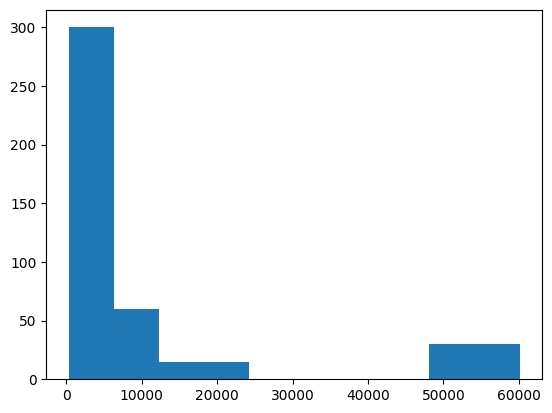

In [14]:
mt.hist(numeric['Avg Price'])

In [15]:
priceSkew=skew(numeric['Avg Price'])
priceKurt=kurtosis(numeric['Avg Price'])
print(priceSkew)
print(priceKurt)

1.9025042657554003
2.039360015030371


In [16]:
Avgq1 = numeric['Avg Price'].quantile(0.25)
Avgq3 = numeric['Avg Price'].quantile(0.75)
Avgiqr = Avgq3 - Avgq1
Avglower_bound = Avgq1 - 1.5 * Avgiqr
Avgupper_bound = Avgq3 + 1.5 * Avgiqr
Avgoutliers = numeric['Avg Price'][(numeric['Avg Price'] < Avglower_bound) | (numeric['Avg Price'] > Avgupper_bound)]
print({len(Avgoutliers)})
print(Avgoutliers)

{60}
6      49100
7      54100
8      55100
9      60100
36     49100
37     54100
38     55100
39     60100
66     49100
67     54100
68     55100
69     60100
96     49100
97     54100
98     55100
99     60100
126    49100
127    54100
128    55100
129    60100
156    49100
157    54100
158    55100
159    60100
186    49100
187    54100
188    55100
189    60100
216    49100
217    54100
218    55100
219    60100
246    49100
247    54100
248    55100
249    60100
276    49100
277    54100
278    55100
279    60100
306    49100
307    54100
308    55100
309    60100
336    49100
337    54100
338    55100
339    60100
366    49100
367    54100
368    55100
369    60100
396    49100
397    54100
398    55100
399    60100
426    49100
427    54100
428    55100
429    60100
Name: Avg Price, dtype: int64


(array([305.,  24.,  15.,  18.,  12.,  27.,  15.,  15.,  11.,   8.]),
 array([   400.,  20000.,  39600.,  59200.,  78800.,  98400., 118000.,
        137600., 157200., 176800., 196400.]),
 <BarContainer object of 10 artists>)

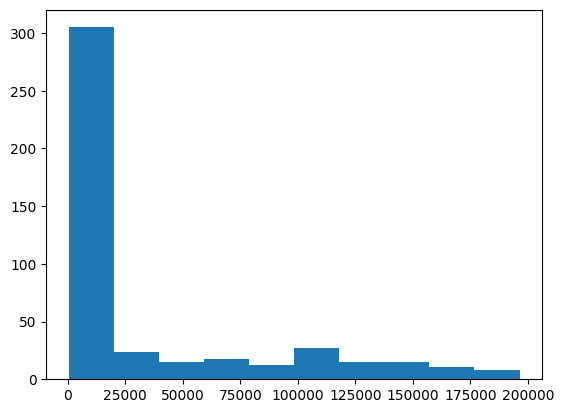

In [17]:
mt.hist(numeric['Total Sales Value'])

In [18]:
tsvSkew=skew(numeric['Total Sales Value'])
tsvKurt=kurtosis(numeric['Total Sales Value'])
print(tsvSkew)
print(tsvKurt)

1.529608815284332
1.0002597538380904


In [19]:
tsvq1 = numeric['Total Sales Value'].quantile(0.25)
tsvq3 = numeric['Total Sales Value'].quantile(0.75)
tsviqr = tsvq3 - tsvq1
tsvlower_bound = tsvq1 - 1.5 * tsviqr
tsvupper_bound = tsvq3 + 1.5 * tsviqr
tsvoutliers = numeric['Total Sales Value'][(numeric['Total Sales Value'] < tsvlower_bound) | (numeric['Total Sales Value'] > tsvupper_bound)]
print({len(tsvoutliers)})
print(tsvoutliers)

{36}
0      181500
6      147300
9      180300
30     133100
36     147300
38     165300
39     180300
66     196400
96     147300
126    147300
127    162300
157    162300
180    145200
186    147300
187    162300
188    165300
189    180300
210    169400
216    147300
240    181500
243    140700
246    147300
278    165300
300    145200
306    147300
308    165300
309    180300
338    165300
339    180300
363    140700
366    147300
390    133100
396    147300
420    157300
426    147300
428    165300
Name: Total Sales Value, dtype: int64


(array([299.,  37.,  42.,  29.,  22.,   8.,   9.,   0.,   2.,   2.]),
 array([   69.17794229,  2636.06236744,  5202.94679258,  7769.83121773,
        10336.71564288, 12903.60006802, 15470.48449317, 18037.36891832,
        20604.25334346, 23171.13776861, 25738.02219376]),
 <BarContainer object of 10 artists>)

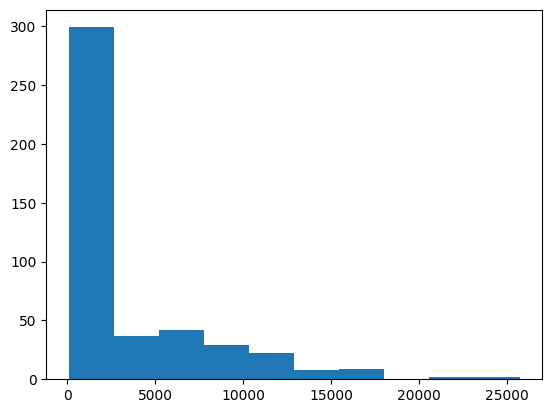

In [20]:
mt.hist(numeric['Discount Amount'])

In [21]:
daSkew=skew(numeric['Discount Amount'])
daKurt=kurtosis(numeric['Discount Amount'])
print(daSkew)
print(daKurt)

1.9066550278687509
3.7754456959744696


In [22]:
daq1 = numeric['Discount Amount'].quantile(0.25)
daq3 = numeric['Discount Amount'].quantile(0.75)
daiqr = daq3 - daq1
dalower_bound = daq1 - 1.5 * daiqr
daupper_bound = daq3 + 1.5 * daiqr
daoutliers = numeric['Discount Amount'][(numeric['Discount Amount'] < dalower_bound) | (numeric['Discount Amount'] > daupper_bound)]
print({len(daoutliers)})
print(daoutliers)

{24}
0      21153.498820
6      13594.039719
9      17900.983733
30     17445.603828
38     13951.660194
39     16384.029009
66     16892.520951
90     15214.643324
96     12622.503658
180    17178.331859
186    12753.565958
188    13999.938499
189    17696.813621
210    25328.224204
216    13608.238319
240    25738.022194
300    21496.675367
309    16332.919930
339    14036.838652
363    12734.009012
366    13275.780741
390    16218.594720
396    13382.227333
420    15984.732281
Name: Discount Amount, dtype: float64


(array([ 27.,  24.,  29.,  14.,  14.,   6.,  38.,  96., 115.,  87.]),
 array([ 5.00782219,  6.50628067,  8.00473916,  9.50319765, 11.00165613,
        12.50011462, 13.9985731 , 15.49703159, 16.99549007, 18.49394856,
        19.99240704]),
 <BarContainer object of 10 artists>)

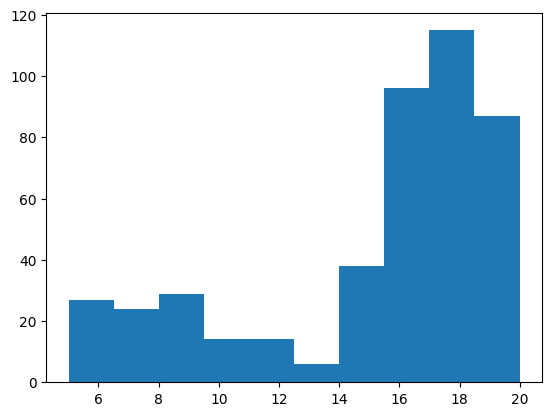

In [23]:
mt.hist(numeric['Discount Rate (%)'])

In [24]:
drSkew=skew(numeric['Discount Rate (%)'])
drKurt=kurtosis(numeric['Discount Rate (%)'])
print(drSkew)
print(drKurt)

-1.0587501046709231
-0.18986689223571407


In [25]:
drq1 = numeric['Discount Rate (%)'].quantile(0.25)
drq3 = numeric['Discount Rate (%)'].quantile(0.75)
driqr = drq3 - drq1
drlower_bound = drq1 - 1.5 * driqr
drupper_bound = drq3 + 1.5 * driqr
droutliers = numeric['Discount Rate (%)'][(numeric['Discount Rate (%)'] < drlower_bound) | (numeric['Discount Rate (%)'] > drupper_bound)]
print({len(droutliers)})
print(droutliers)

{45}
3      6.935385
7      5.553719
8      7.410104
33     6.214888
36     5.252113
67     7.621791
69     5.007822
93     5.870671
98     6.710454
99     6.095201
127    5.935084
128    7.584591
152    7.732667
153    7.233847
156    5.420507
157    6.849976
159    7.256696
187    7.178726
212    7.679386
213    5.794802
218    5.059801
242    6.858255
243    7.208363
246    7.341874
248    6.473305
249    6.439920
273    7.421326
278    6.268914
279    6.819111
302    6.170398
303    5.072124
307    6.106931
308    6.508719
336    6.066192
338    5.084108
368    6.326892
393    6.415230
397    5.055218
398    5.411802
399    5.511042
422    5.485157
423    5.466379
426    6.008200
427    6.642595
428    5.425911
Name: Discount Rate (%), dtype: float64


(array([306.,  26.,  17.,  14.,   8.,  30.,  16.,  15.,  12.,   6.]),
 array([   326.97480055,  18245.0252254 ,  36163.07565025,  54081.1260751 ,
         71999.17649994,  89917.22692479, 107835.27734964, 125753.32777448,
        143671.37819933, 161589.42862418, 179507.47904902]),
 <BarContainer object of 10 artists>)

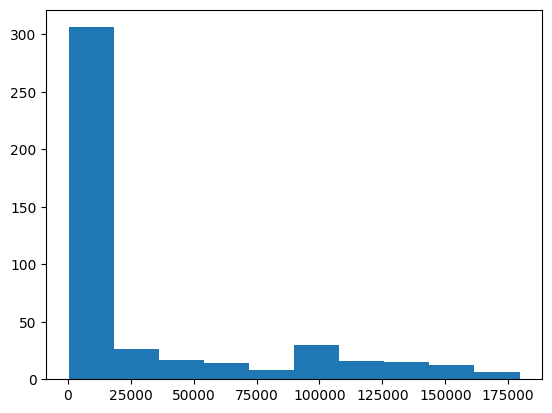

In [26]:
mt.hist(numeric['Net Sales Value'])

In [27]:
nsSkew=skew(numeric['Net Sales Value'])
nsKurt=kurtosis(numeric['Net Sales Value'])
print(nsSkew)
print(nsKurt)

1.535680921975744
0.9879493936106392


In [28]:
nsq1 = numeric['Net Sales Value'].quantile(0.25)
nsq3 = numeric['Net Sales Value'].quantile(0.75)
nsiqr = nsq3 - nsq1
nslower_bound = nsq1 - 1.5 * nsiqr
nsupper_bound = nsq3 + 1.5 * nsiqr
nsoutliers = numeric['Net Sales Value'][(numeric['Net Sales Value'] < nslower_bound) | (numeric['Net Sales Value'] > nsupper_bound)]
print({len(nsoutliers)})
print(nsoutliers)

{35}
0      160346.501180
6      133705.960281
9      162399.016267
36     139563.638215
38     151348.339806
39     163915.971000
66     179507.479049
96     134677.496342
126    134731.954625
127    152667.358354
157    151182.489533
180    128021.668141
186    134546.434042
187    150648.927866
188    151300.061501
189    162603.186379
210    144071.775796
216    133691.761681
240    155761.977806
243    130557.833327
246    136485.419091
278    154937.485475
300    123703.324633
306    134934.946692
308    154541.087365
309    163967.080070
338    156895.968772
339    166263.161348
363    127965.990988
366    134024.219259
390    116881.405280
396    133917.772667
420    141315.267719
426    138449.922039
428    156330.969890
Name: Net Sales Value, dtype: float64


#BoxPlot

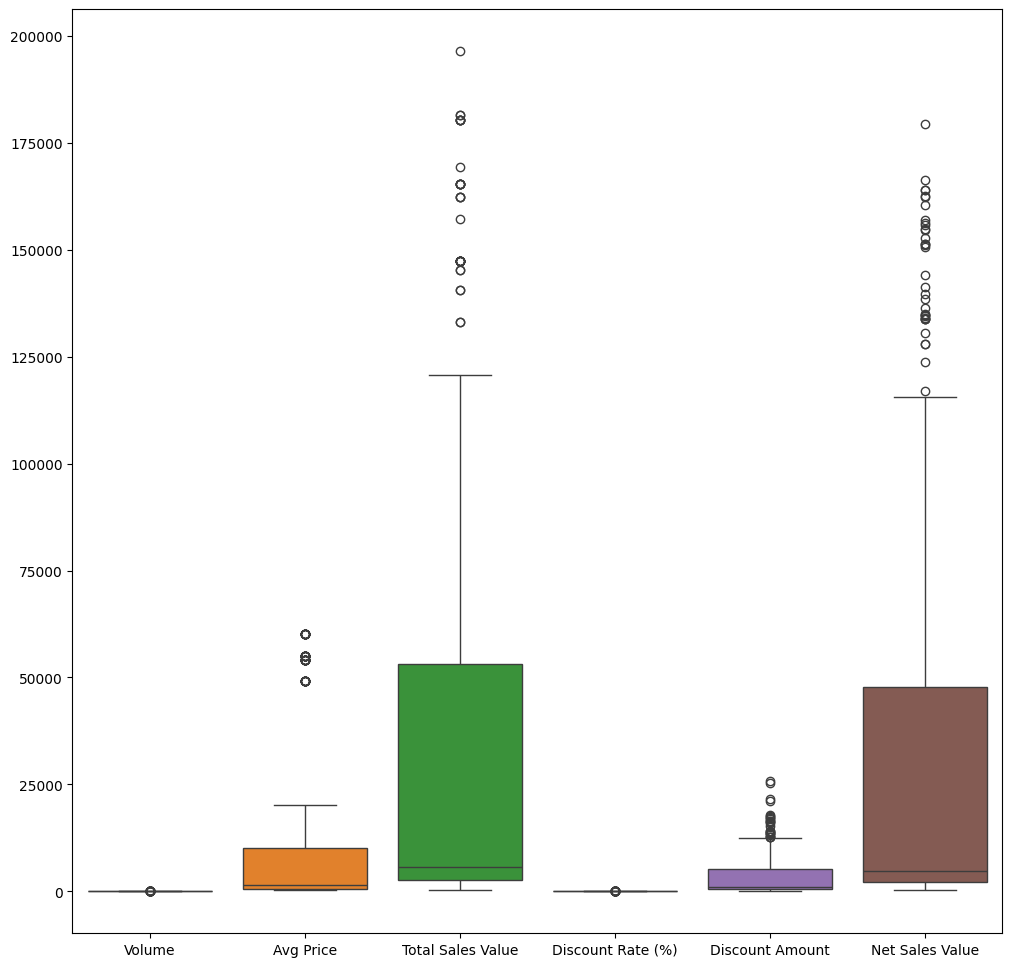

In [29]:
mt.figure(figsize=(12,12))
sns.boxplot(data=numeric)
mt.show()

#BarChart

In [30]:
categorical=data.select_dtypes(include=['object','category']).columns


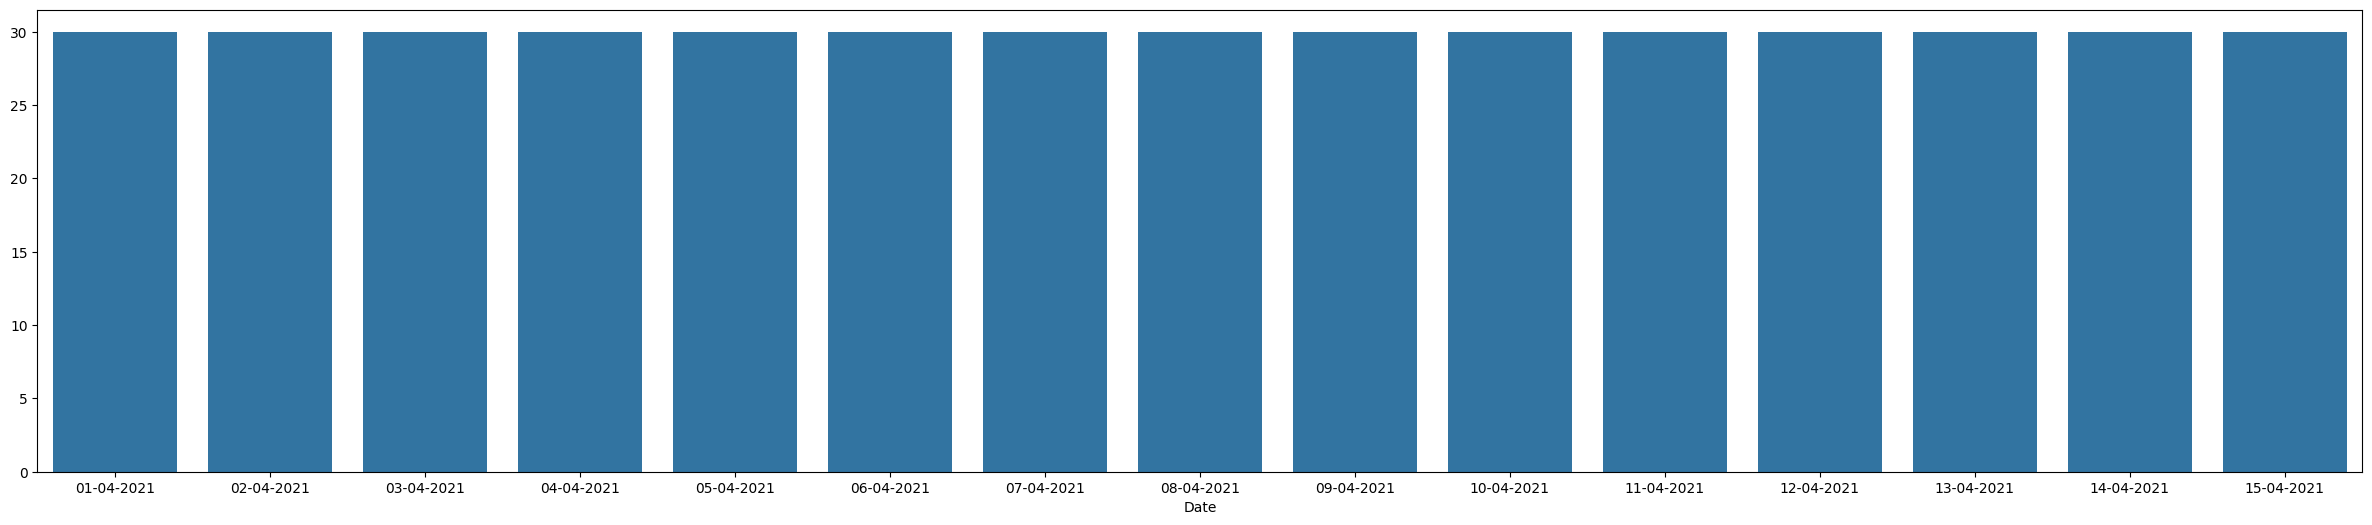

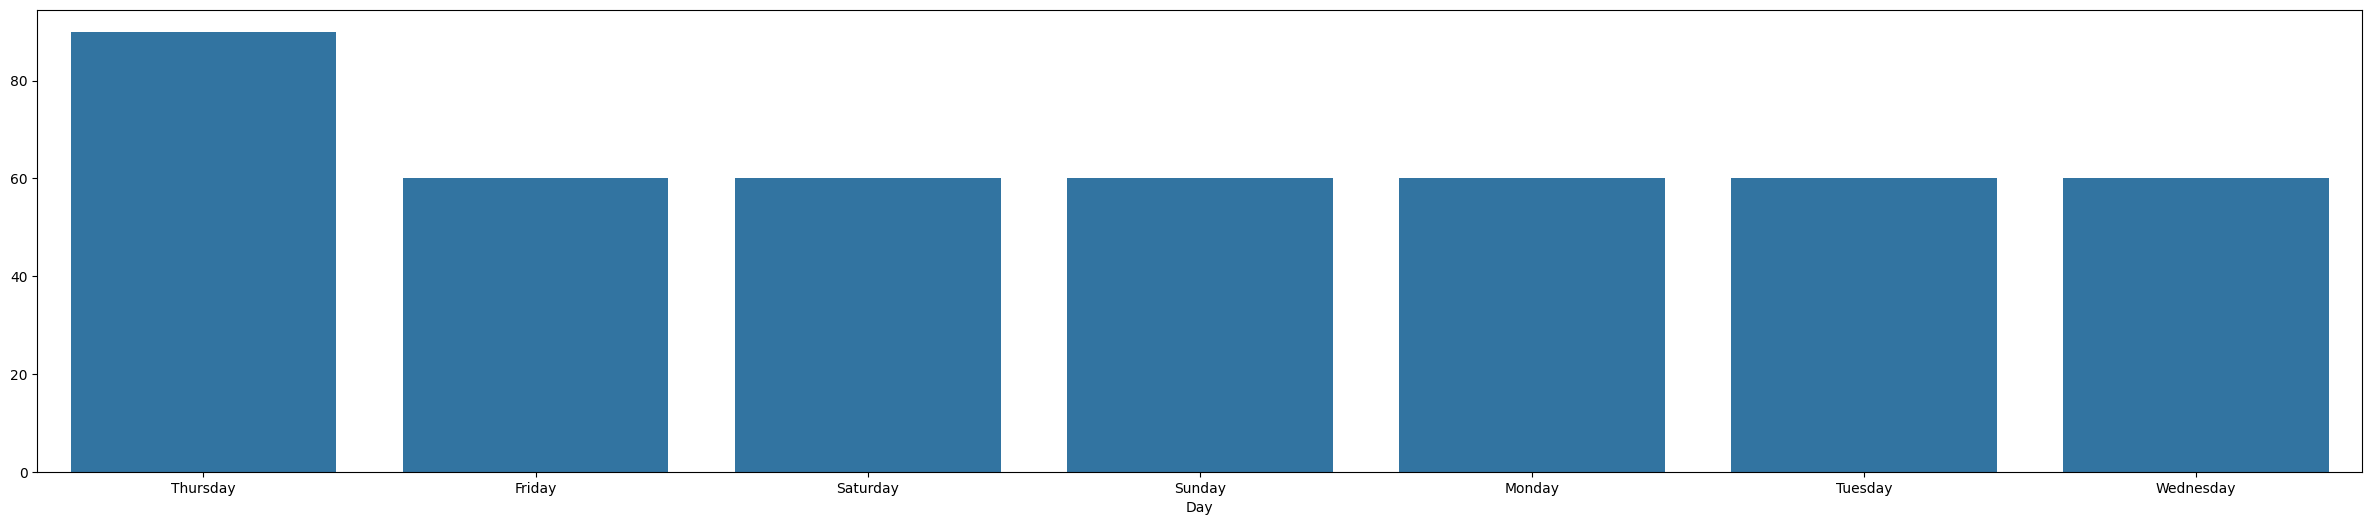

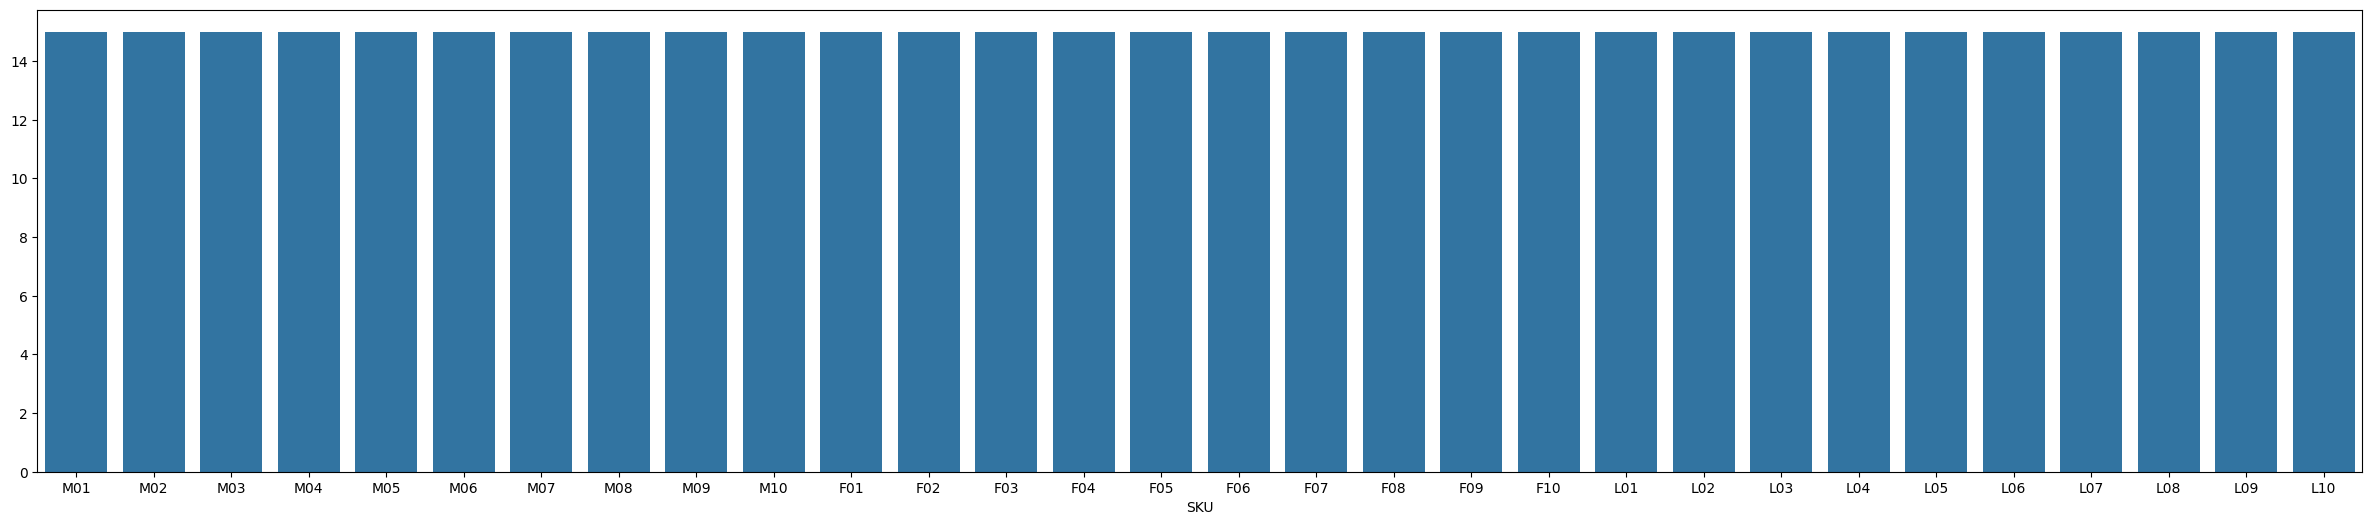

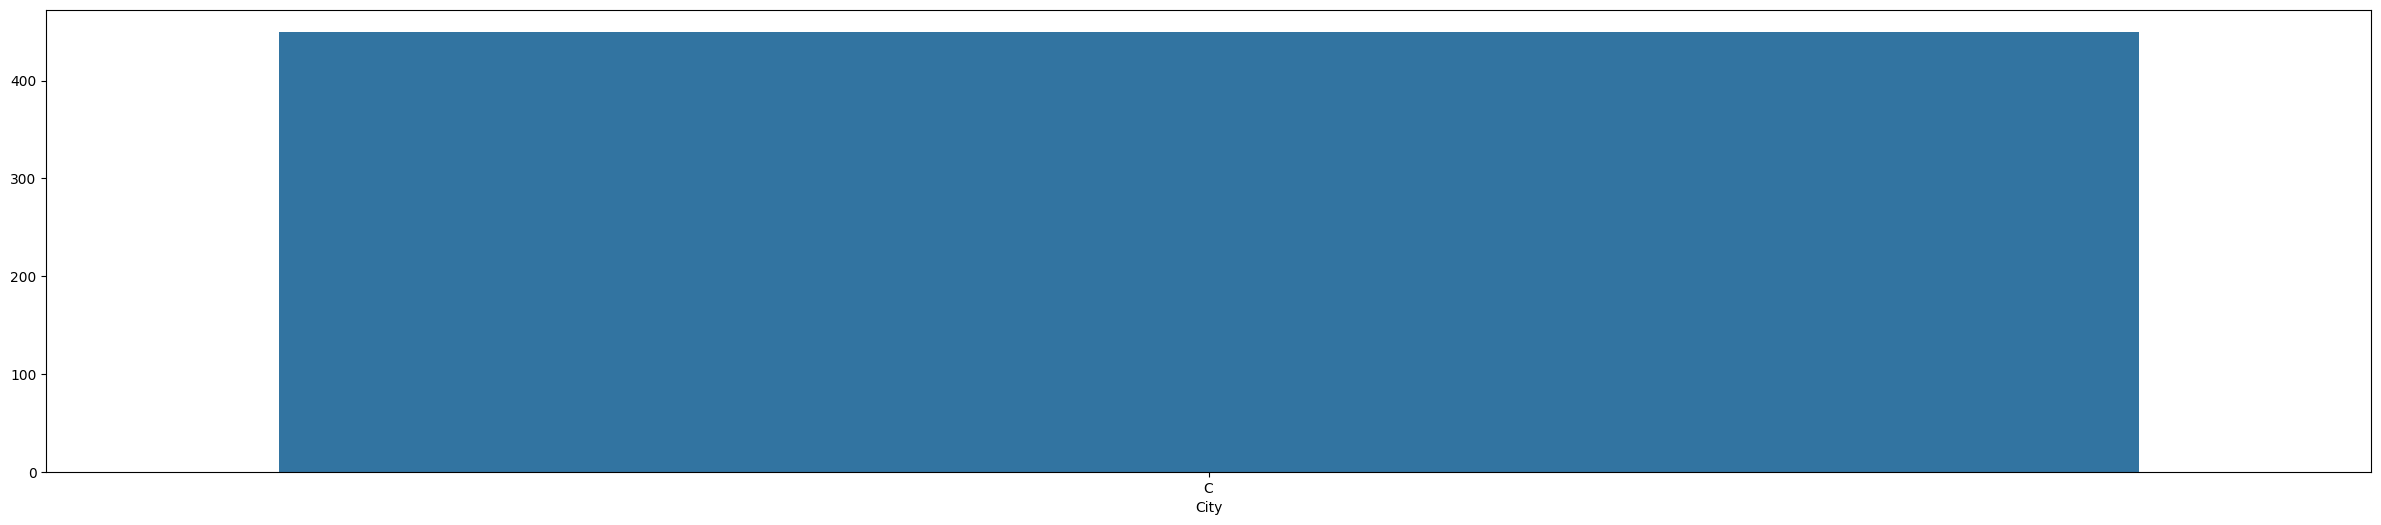

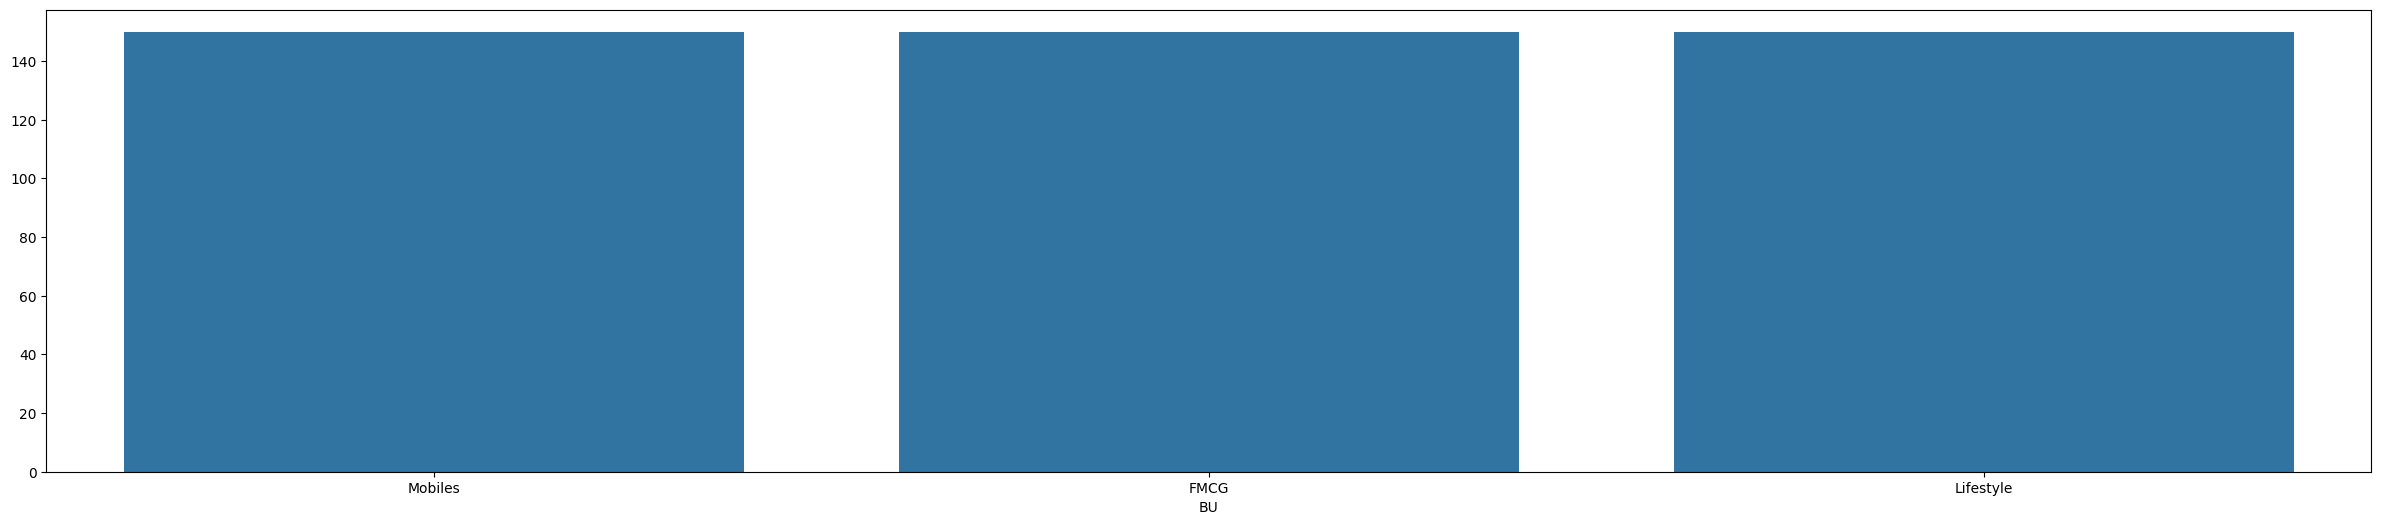

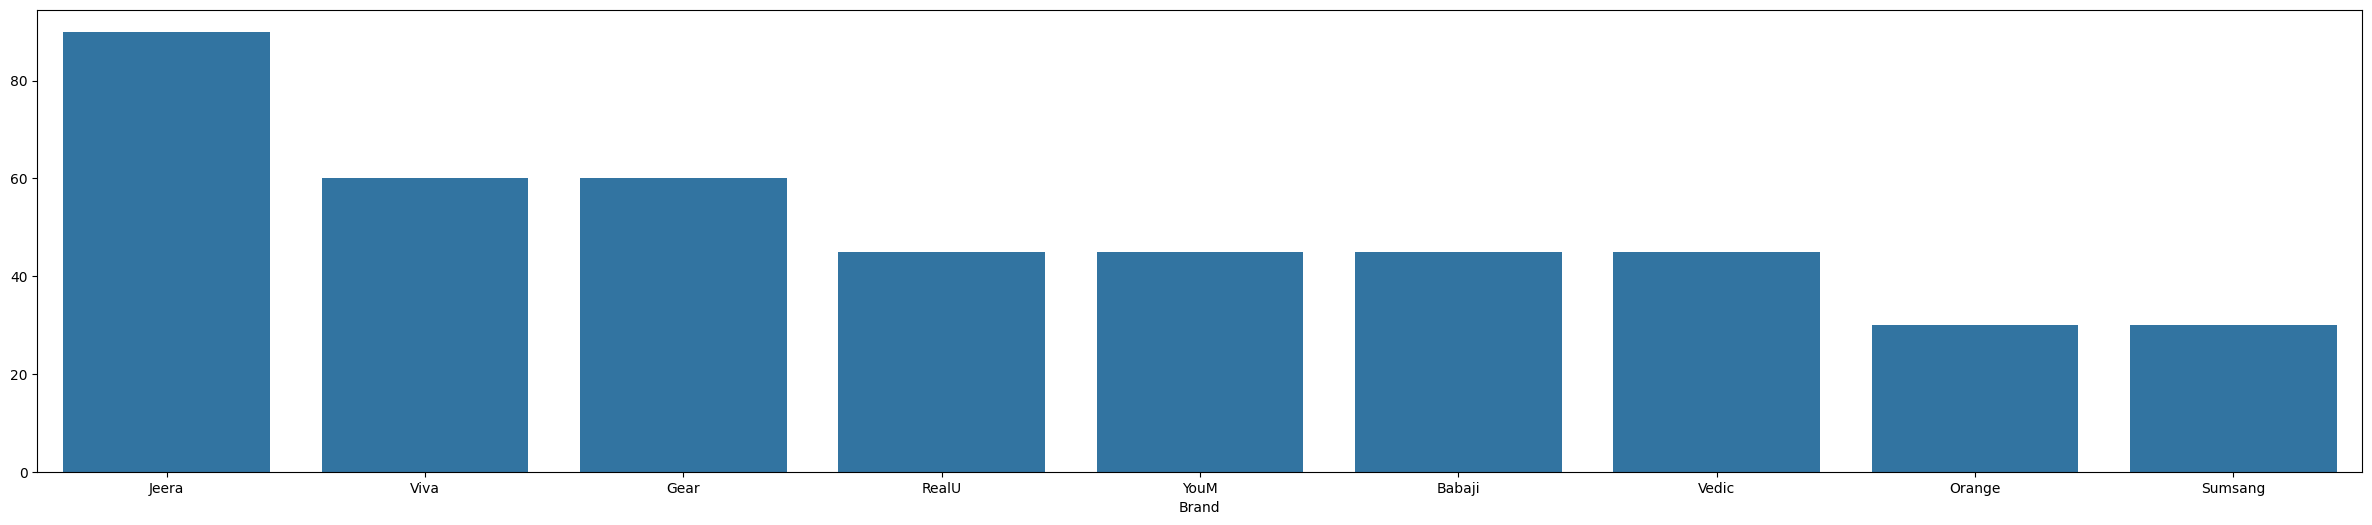

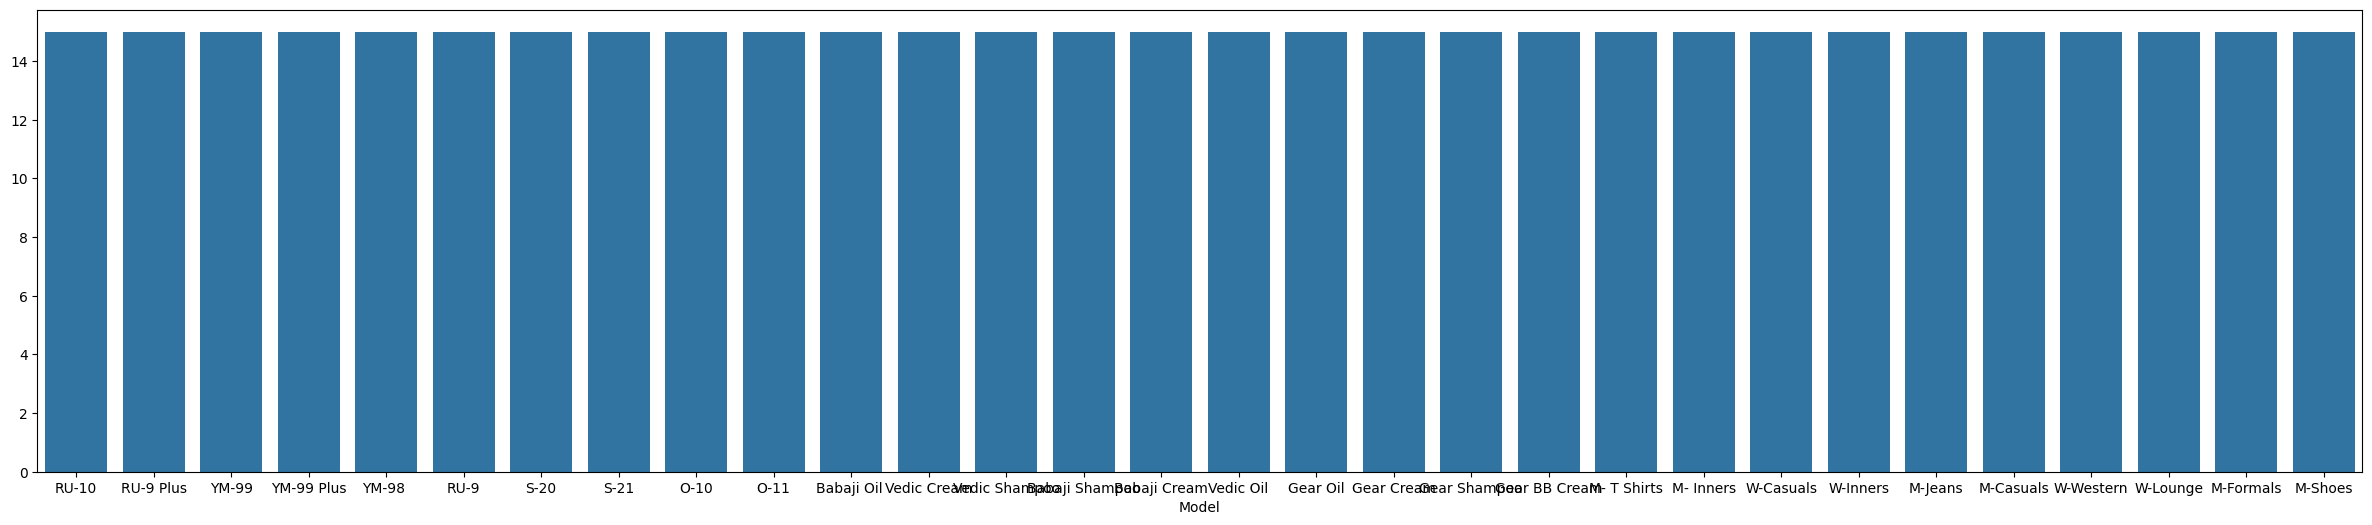

In [31]:
for column in categorical:
    mt.figure(figsize=(30, 6))
    value_counts = data[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)

#Before standardization

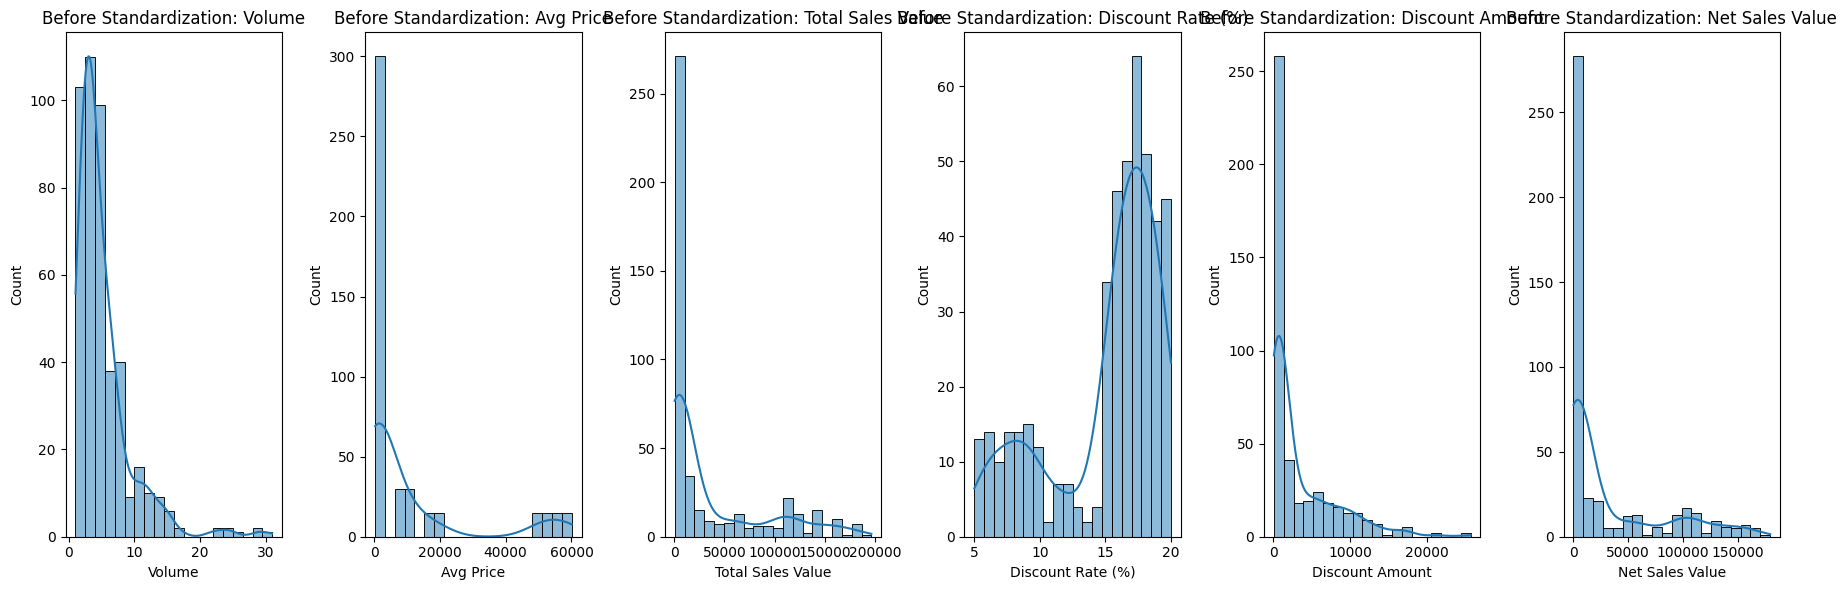

In [32]:
mt.figure(figsize=(18, 6))
for i, column in enumerate(numeric.columns, 1):
    mt.subplot(1, len(numeric.columns), i)
    sns.histplot(numeric[column], kde=True, bins=20)
    mt.title(f'Before Standardization: {column}')
mt.tight_layout()
mt.show()


#Standardize the numerical columns using Z-score

In [33]:
scaler = StandardScaler()
df_standardized = data.copy()
df_standardized[numeric.columns] = scaler.fit_transform(numeric)

#After standardization

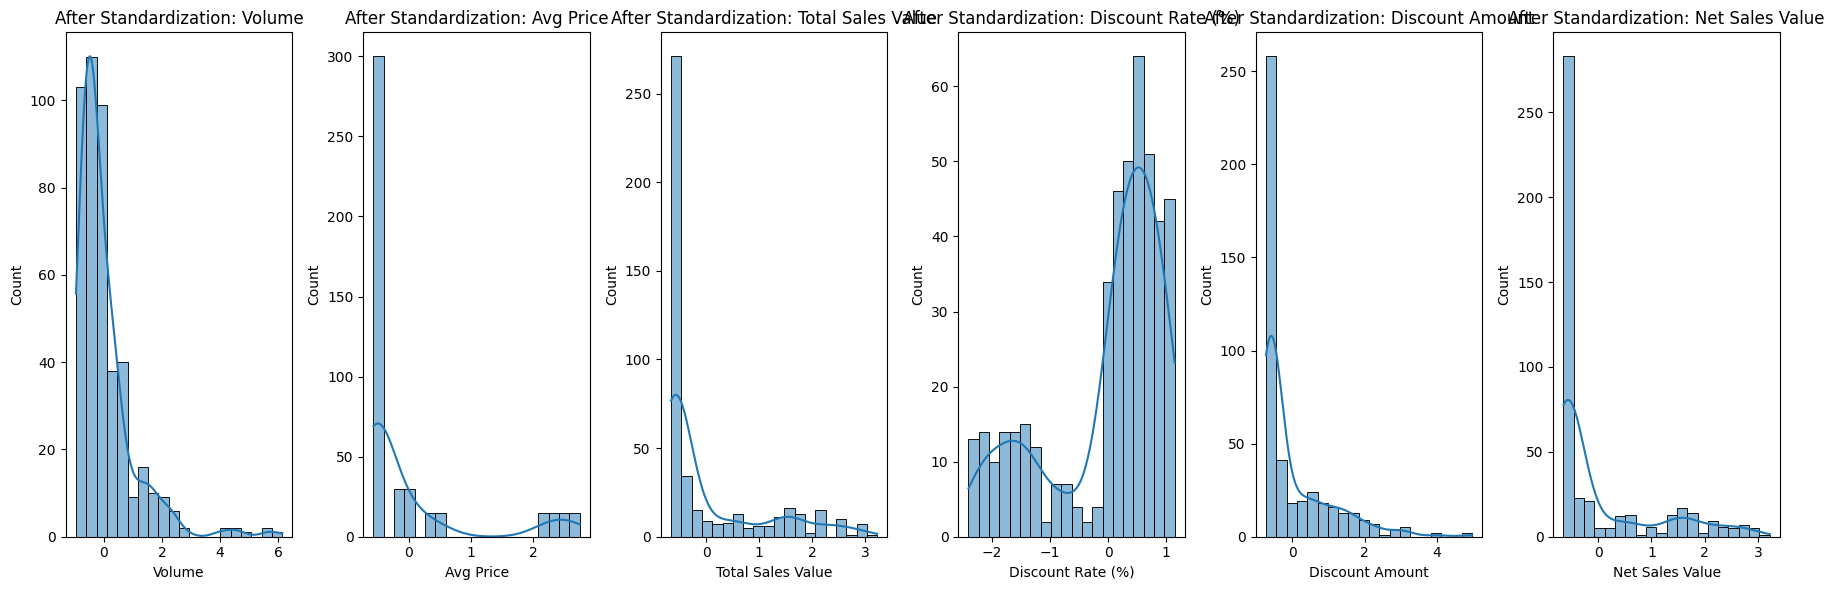

In [34]:
mt.figure(figsize=(18, 6))

for i, column in enumerate(numeric.columns, 1):
    mt.subplot(1, len(numeric.columns), i)
    sns.histplot(df_standardized[column], kde=True, bins=20)
    mt.title(f'After Standardization: {column}')
mt.tight_layout()
mt.show()

#show comparisons

In [35]:
for column in numeric.columns:
    original_mean = numeric[column].mean()
    original_std = numeric[column].std()
    standardized_mean = df_standardized[column].mean()
    standardized_std = df_standardized[column].std()
    print(f"\n{column}:")
    print(f"  Before Standardization -> Mean: {original_mean}, Std Dev: {original_std}")
    print(f"  After Standardization -> Mean: {standardized_mean}, Std Dev: {standardized_std}")


Volume:
  Before Standardization -> Mean: 5.066666666666666, Std Dev: 4.231602391213923
  After Standardization -> Mean: 6.118562446823085e-17, Std Dev: 1.0011129663989997

Avg Price:
  Before Standardization -> Mean: 10453.433333333332, Std Dev: 18079.90483993647
  After Standardization -> Mean: 3.157967714489334e-17, Std Dev: 1.0011129663989997

Total Sales Value:
  Before Standardization -> Mean: 33812.83555555555, Std Dev: 50535.07417255325
  After Standardization -> Mean: 1.578983857244667e-17, Std Dev: 1.0011129663989997

Discount Rate (%):
  Before Standardization -> Mean: 15.155241895330914, Std Dev: 4.22060215332551
  After Standardization -> Mean: -3.552713678800501e-17, Std Dev: 1.0011129663989997

Discount Amount:
  Before Standardization -> Mean: 3346.499424342415, Std Dev: 4509.902963353998
  After Standardization -> Mean: -5.5264435003563346e-17, Std Dev: 1.001112966399

Net Sales Value:
  Before Standardization -> Mean: 30466.336131270138, Std Dev: 46358.65662406695
  